In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
df = pd.read_csv("train.csv")

In [21]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [23]:
df.price_range.unique()

array([1, 2, 3, 0])

Now lets see how the features having binary values are distributed across the classes.

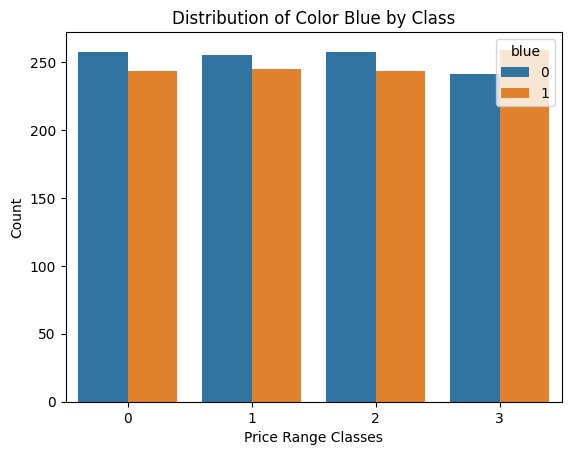

In [25]:
import seaborn as sns
sns.countplot(x='price_range', hue='blue', data=df)
plt.xlabel("Price Range Classes")
plt.ylabel("Count")
plt.title("Distribution of Color Blue by Class")
plt.show()

Blue color seems to be uniformly distributed everywhere suggesting it has no effect on price

In [27]:
df.drop(['blue'],inplace=True,axis=1)

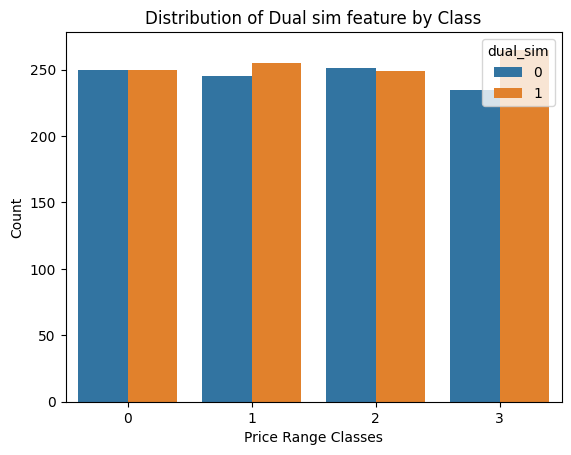

In [28]:
import seaborn as sns
sns.countplot(x='price_range', hue='dual_sim', data=df)
plt.xlabel("Price Range Classes")
plt.ylabel("Count")
plt.title("Distribution of Dual sim feature by Class")
plt.show()

In [29]:
df.drop(['dual_sim'],inplace=True,axis=1)

Dual sim feature seems to be uniformly distributed everywhere suggesting it has no effect on price

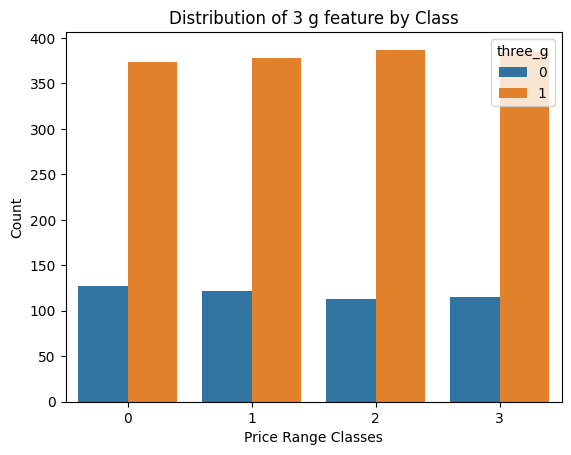

In [30]:
import seaborn as sns
sns.countplot(x='price_range', hue='three_g', data=df)
plt.xlabel("Price Range Classes")
plt.ylabel("Count")
plt.title("Distribution of 3 g feature by Class")
plt.show()

In [31]:
df.drop(['three_g'],inplace=True,axis=1)

3g feature also seems to be uniformly distributed everywhere suggesting it has no effect on price

Theres no need to check wifi touch screen and 4g feature because we know from our domain knowledge those are crucial features

In [32]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X)
print(Y)

      battery_power  clock_speed  fc  four_g  int_memory  m_dep  mobile_wt  \
0               842          2.2   1       0           7    0.6        188   
1              1021          0.5   0       1          53    0.7        136   
2               563          0.5   2       1          41    0.9        145   
3               615          2.5   0       0          10    0.8        131   
4              1821          1.2  13       1          44    0.6        141   
...             ...          ...  ..     ...         ...    ...        ...   
1995            794          0.5   0       1           2    0.8        106   
1996           1965          2.6   0       0          39    0.2        187   
1997           1911          0.9   1       1          36    0.7        108   
1998           1512          0.9   4       1          46    0.1        145   
1999            510          2.0   5       1          45    0.9        168   

      n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_

#Using the softmax regression model


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# do train and test set split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [38]:
# perform feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
# multinomial value specifies we are using softmax regression
# The 'lbfgs' solver is often used with logistic regression for multiclass problems.
# This parameter sets the maximum number of iterations for the solver to converge.

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.93      0.93      0.93        92
           2       0.95      0.91      0.93        99
           3       0.96      0.99      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

